<a href="https://colab.research.google.com/github/pavelpryadokhin/YOLO-sign/blob/main/YOLO_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ YOLO –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏ –æ–±—ä–µ–∫—Ç–æ–≤ –≤ —É—Å–ª–æ–≤–∏—è—Ö —Å–ª–æ–∂–Ω–æ–π –æ—Å–≤–µ—â–µ–Ω–Ω–æ—Å—Ç–∏.

**–ê–≤—Ç–æ—Ä**: [–ü—Ä—è–¥–æ—Ö–∏–Ω –ü–∞–≤–µ–ª](https://github.com/pavelpryadokhin)

**–ê–Ω–Ω–æ—Ç–∞—Ü–∏—è**: –¶–µ–ª—å—é —Ä–∞–±–æ—Ç—ã —è–≤–ª—è–µ—Ç—Å—è –∏–∑—É—á–∏—Ç—å –º–µ—Ç–æ–¥—ã, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –ø–æ–º–æ—á—å —É–ª—É—á—à–∏—Ç—å —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–µ –¥–æ—Ä–æ–∂–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ YOLO –≤ —É—Å–ª–æ–≤–∏—è—Ö –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–π –≤–∏–¥–∏–º–æ—Å—Ç–∏.

#–£–°–¢–ê–ù–û–í–ö–ê –ò –ò–ú–ü–û–†–¢ –ë–ò–ë–õ–ò–û–¢–ï–ö

In [ ]:
!pip install ultralytics > /dev/null 2>&1

In [ ]:
import kagglehub
import json
import shutil
import yaml
import os
import ultralytics
from ultralytics import YOLO, settings
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import albumentations as A
import cv2
from moviepy.editor import *
import warnings
warnings.filterwarnings('ignore')

#–¢–ï–û–†–ï–¢–ò–ß–ï–°–ö–ê–Ø –ß–ê–°–¢–¨

##–ö—Ä–∞—Ç–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã

–î–µ—Ç–µ–∫—Ü–∏—è –æ–±—ä–µ–∫—Ç–æ–≤ –≤ —É—Å–ª–æ–≤–∏—è—Ö —Å–ª–æ–∂–Ω–æ–π –æ—Å–≤–µ—â–µ–Ω–Ω–æ—Å—Ç–∏ (–Ω–∏–∑–∫–∞—è —è—Ä–∫–æ—Å—Ç—å, –±–ª–∏–∫–∏, —à—É–º—ã) ‚Äî –∫–ª—é—á–µ–≤–∞—è –∑–∞–¥–∞—á–∞ –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω–æ–≥–æ –∑—Ä–µ–Ω–∏—è. –¢—Ä–∞–¥–∏—Ü–∏–æ–Ω–Ω—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ CNN) —á–∞—Å—Ç–æ –æ—à–∏–±–∞—é—Ç—Å—è –∏–∑-–∑–∞:

*  –ù–∏–∑–∫–æ–≥–æ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–∞ –º–µ–∂–¥—É –æ–±—ä–µ–∫—Ç–æ–º –∏ —Ñ–æ–Ω–æ–º

*  –ê—Ä—Ç–µ—Ñ–∞–∫—Ç–æ–≤ —Å–µ–Ω—Å–æ—Ä–∞ (—à—É–º, —Ä–∞–∑–º—ã—Ç–∏–µ)

*  –î–∏–Ω–∞–º–∏—á–µ—Å–∫–æ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è –æ—Å–≤–µ—â–µ–Ω–∏—è

–î–ª—è –ø—Ä–µ–æ–¥–æ–ª–µ–Ω–∏—è —ç—Ç–∏—Ö –ø—Ä–æ–±–ª–µ–º –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥ YOLO (You Only Look Once) –≤ —Å–æ—á–µ—Ç–∞–Ω–∏–∏ —Å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–µ–π –¥–∞–Ω–Ω—ã—Ö.

##–û—Å–Ω–æ–≤–Ω—ã–µ –∫–æ–Ω—Ü–µ–ø—Ü–∏–∏

**YOLO (You Only Look Once):** –ú–µ—Ç–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–±–Ω–∞—Ä—É–∂–∏–≤–∞—Ç—å –æ–±—ä–µ–∫—Ç—ã –≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –≤ —Ä–µ–∞–ª—å–Ω–æ–º –≤—Ä–µ–º–µ–Ω–∏. –û–Ω –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –µ–¥–∏–Ω—É—é –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≥—Ä–∞–Ω–∏—Ü –ø—Ä—è–º–æ—É–≥–æ–ª—å–Ω–∏–∫–æ–≤ –∏ –∫–ª–∞—Å—Å–æ–≤ –æ–±—ä–µ–∫—Ç–æ–≤.

**–ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π:** –ú–µ—Ç–æ–¥—ã —É–ª—É—á—à–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —Ç–∞–∫–∏–µ –∫–∞–∫ –∏–∑–º–µ–Ω–µ–Ω–∏–µ —è—Ä–∫–æ—Å—Ç–∏ –∏ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–∞, –ø–æ–∑–≤–æ–ª—è—é—â–∏–µ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –¥–µ—Ç–µ–∫—Ü–∏–∏.

**–ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö:** –ü—Ä–æ—Ü–µ—Å—Å —É–≤–µ–ª–∏—á–µ–Ω–∏—è –æ–±—ä–µ–º–∞ –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö –∑–∞ —Å—á–µ—Ç —Å–æ–∑–¥–∞–Ω–∏—è –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –≤–µ—Ä—Å–∏–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.

##–ú–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ

**–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å YOLO:**

$$
\mathcal{L} = \lambda_{\text{coord}} \sum (x - \hat{x})^2 + \lambda_{\text{obj}} \sum (C - \hat{C})^2 + \lambda_{\text{noobj}} \sum (C - \hat{C})^2 + \sum (p - \hat{p})^2
$$

**–ì–¥–µ:**
- $(x, C, p)$ ‚Äî –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã bbox, —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å, –∫–ª–∞—Å—Å  
- $\lambda$ ‚Äî –≤–µ—Å–æ–≤—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã  

---
**–ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏:**

–î–ª—è –ø–∏–∫—Å–µ–ª—è $I(x,y)$:

$$
I_{\text{aug}} = \alpha I + \beta + \mathcal{N}(0, \sigma^2) \quad (\alpha = \text{–∫–æ–Ω—Ç—Ä–∞—Å—Ç}, \beta = \text{—è—Ä–∫–æ—Å—Ç—å})
$$


##–°—Ö–µ–º–∞ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã

–ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ YOLO —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ —Å–ª–µ–¥—É—é—â–∏—Ö –æ—Å–Ω–æ–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–æ–≤:

*  **–í—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ:** –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç—Å—è —á–µ—Ä–µ–∑ —Å–µ—Ç—å —Å–≤—ë—Ä—Ç–æ—á–Ω—ã—Ö —Å–ª–æ–µ–≤.
*  **–î–µ—Ç–µ–∫—Ü–∏—è –∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è:** –ü—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ, –æ–±–µ—Å–ø–µ—á–∏–≤–∞—è –±—ã—Å—Ç—Ä—É—é –æ–±—Ä–∞–±–æ—Ç–∫—É.
*  **–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:** –°–æ–¥–µ—Ä–∂–∏—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –æ –º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–∏ –∏ –∫–ª–∞—Å—Å–∞—Ö –æ–±—ä–µ–∫—Ç–æ–≤.





# –ü–û–î–ì–û–¢–û–í–ö–ê –î–ê–ù–ù–´–•

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞
path = kagglehub.dataset_download("watchman/rtsd-dataset")
shutil.move(path, '.')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 17.1G/17.1G [03:12<00:00, 95.6MB/s]

Extracting files...


'./3'

##–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

In [ ]:
# –ø—É—Ç—å –∫ –¥–∞—Ç–∞—Å–µ—Ç—É
root_dataset = '/content/3'

# –ø—É—Ç—å –∫ label2id —Å–ª–æ–≤–∞—Ä—é
labels_path = f'{root_dataset}/labels.txt'

# –ø—É—Ç–∏ –∫ —Ñ–∞–π–ª–∞–º –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π
json_train = f'{root_dataset}/train_anno.json'
json_val = f'{root_dataset}/val_anno.json'

# –ø—É—Ç—å –∫ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏
path_to_images = f'{root_dataset}/rtsd-frames/rtsd-frames'

# –ø—É—Ç–∏ –¥–ª—è —Ñ–æ—Ä–º–∞—Ç–∞ yolo
path_yolo_dataset = './dataset'
output_train = f'{path_yolo_dataset}/train'
output_valid = f'{path_yolo_dataset}/valid'
yaml_path = f'{path_yolo_dataset}/traffic_signs.yaml'

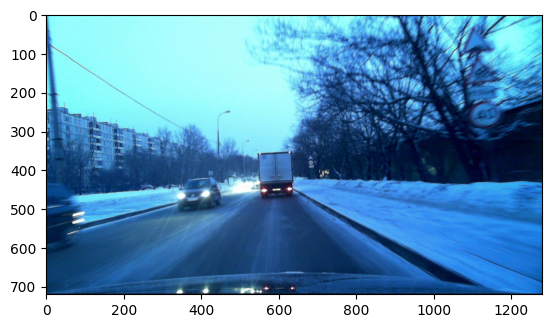

In [ ]:
# –û–±—Ä–∞–∑–µ—Ü –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
image = cv2.imread('./3/rtsd-frames/rtsd-frames/autosave01_02_2012_09_13_45.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

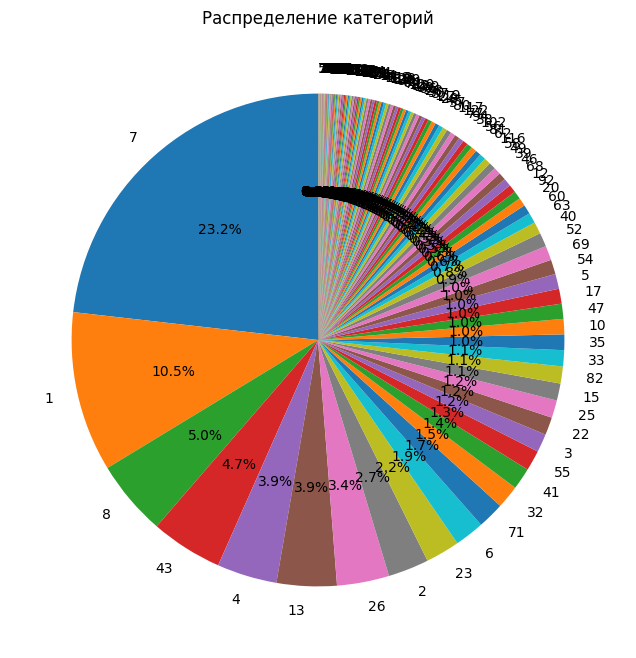

In [ ]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
with open(json_train, 'r', encoding='utf-8') as file:
    json_data = json.load(file)

df = pd.DataFrame(json_data['annotations'])
class_counts = df['category_id'].value_counts()
df['category_id'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π')
plt.ylabel('')
plt.show()

In [ ]:
def get_filter_id(df, samples_per_class= 100, min_area=0):
    df = df[df['area'] >= min_area]
    balanced_data = []

    for class_id in df['category_id'].unique():
        class_data = df[df['category_id'] == class_id]
        sample = class_data.sample(min(samples_per_class, len(class_data)),
                                   replace=False,
                                  random_state=42)
        balanced_data.append(sample)

    balanced_df = pd.concat(balanced_data)
    return balanced_df


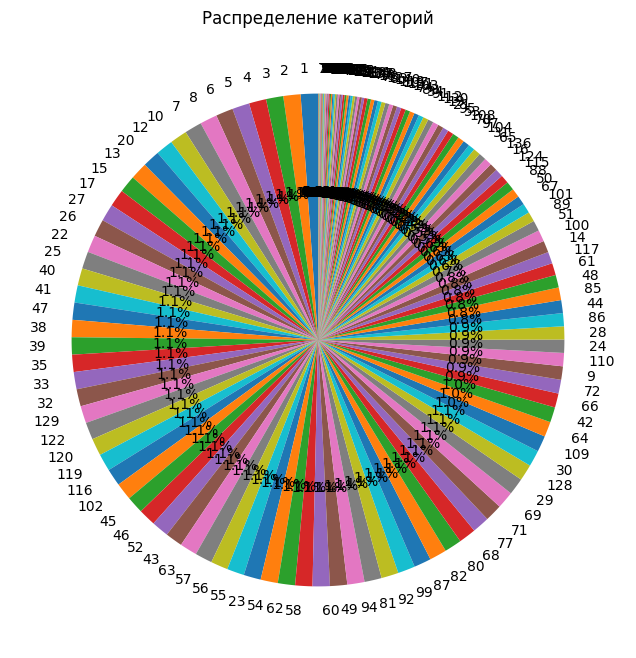

In [ ]:
# –°–±–∞–ª–∞–Ω—Å–∏—Ä—É–µ–º –∫–ª–∞—Å—Å—ã. –û—Ç–±–µ—Ä—ë–º –∏–∑ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ –ø–æ samples_per_class –ø—Ä–∏–º–µ—Ä–æ–≤
# –£—Å—Ç–∞–Ω–æ–≤–∏–º –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –æ–±—ä–µ–∫—Ç–∞ min_area –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –º–∞–ª–µ–Ω—å–∫–∏—Ö –∑–Ω–∞–∫–æ–≤
samples_per_class = 100
min_area = 1000

balanced_df= get_filter_id(df, samples_per_class, min_area)

balanced_df['category_id'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π')
plt.ylabel('')
plt.show()

In [ ]:
# –í–∞–∂–Ω–æ! –î–ª—è —Ç–æ–ª—å–∫–æ –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏ —Å—Ç–∞–≤–∏–º only_detect = True
# –ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Ç–æ–ª—å–∫–æ —Ñ—É–Ω–∫—Ü–∏–∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –±—É–¥–µ—Ç –ø—Ä–æ–∏–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞–Ω–∞ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ –∫–ª–∞—Å—Å–æ–≤.
only_detect = False
filter_annotation = None

if not only_detect:
     filter_annotation = set(balanced_df['id'].to_list())

##–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/val

In [ ]:
def convert_to_yolo(data_path_json, output_dir, image_dir, filter_anno=None):
    # —Å–æ–∑–¥–∞–µ–º –Ω—É–∂–Ω—ã–µ –ø–∞–ø–∫–∏, –µ—Å–ª–∏ –∏—Ö –Ω–µ—Ç
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'labels'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'images'), exist_ok=True)

    # –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    with open(data_path_json) as f:
        data = json.load(f)

    # –°–æ–∑–¥–∞–Ω–∏–µ —Å–ª–æ–≤–∞—Ä—è –¥–ª—è –±—ã—Å—Ç—Ä–æ–≥–æ –¥–æ—Å—Ç—É–ø–∞ –∫ –¥–∞–Ω–Ω—ã–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
    images_info = {image['id']: image for image in data['images']}

    # –ö–æ–Ω–≤–µ—Ä—Ç–∞—Ü–∏—è –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π –≤ —Ñ–æ—Ä–º–∞—Ç YOLO
    for ann in tqdm(data['annotations']):
        if filter_anno:
            if ann['id'] not in filter_anno:
                continue

        image_info = images_info[ann['image_id']]
        image_file_name = image_info['file_name'].split('/')[1]
        path_to_image = os.path.join(image_dir, image_file_name)

        # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è —Ñ–∞–π–ª–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        if not os.path.exists(path_to_image):
            print(image_file_name)
            continue

        # –î–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏ —É–±–∏—Ä–∞–µ–º –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤
        if filter_anno:
            category_id = 0
        else:
            category_id = ann['category_id'] - 1

        width, height = image_info['width'], image_info['height']

        # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç –±–∞—É–Ω–¥–∏–Ω–≥ –±–æ–∫—Å–∞
        x_center = (ann['bbox'][0] + ann['bbox'][2] / 2) / width
        y_center = (ann['bbox'][1] + ann['bbox'][3] / 2) / height
        bbox_width = ann['bbox'][2] / width
        bbox_height = ann['bbox'][3] / height

        # –°–æ–∑–¥–∞–Ω–∏–µ —Å—Ç—Ä–æ–∫–∏ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏ –≤ —Ñ–æ—Ä–º–∞—Ç–µ YOLO
        yolo_format = f"{category_id} {x_center} {y_center} {bbox_width} {bbox_height}\n"

        # –∑–∞–¥–∞–µ–º –ø—É—Ç–∏ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏ –∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        label_file_name = os.path.splitext(image_file_name)[0] + '.txt'
        labels_output_path = os.path.join(output_dir, 'labels', label_file_name)
        images_output_path = os.path.join(output_dir, 'images', image_file_name)

        # –ó–∞–ø–∏—Å—å –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π —Ñ–∞–π–ª
        with open(labels_output_path, 'a') as file:
            file.write(yolo_format)

        # –∫–æ–ø–∏—Ä—É–µ–º —Ñ–∞–π–ª –≤ –Ω—É–∂–Ω—É—é –ø–∞–ø–∫—É
        shutil.copy(path_to_image, images_output_path)

In [ ]:
convert_to_yolo(json_train,
                output_train,
                path_to_images,
                filter_annotation)

convert_to_yolo(json_val,
                output_valid,
                path_to_images)

  0%|          | 0/95492 [00:00<?, ?it/s]

  0%|          | 0/8866 [00:00<?, ?it/s]

In [ ]:
# —Å–æ–∑–¥–∞–¥–∏–º yaml file
data = {
    'path': '.'+path_yolo_dataset,
    'train': 'train/images',
    'val': 'valid/images',
}

if only_detect:
    data['names'] = {
        0: 'traffic_sign'
    }
else:
    with open(labels_path, 'r') as file:
        class_names = [line.strip() for line in file]
        id2class = dict(zip(range(len(class_names)), class_names))
        data['names'] = id2class

with open(yaml_path, 'w') as file:
    yaml.dump(data, file)

#–û–ë–£–ß–ï–ù–ò–ï –ù–ê –ò–°–•–û–î–ù–´–• –î–ê–ù–ù–´–•

##–û–±—É—á–µ–Ω–∏–µ 1-5 —ç–ø–æ—Ö–∞

In [ ]:
# —É–±–µ—Ä–µ–º –ª–∏—à–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏
settings.update({'tensorboard': False,
                  'wandb': False,
                  'mlflow': False,
                  'neptune': False,
                  'comet': False})

model = YOLO('yolo11s.pt')


In [ ]:
# –ü—Ä–æ–≤–µ–¥—ë–º –æ–±—É—á–µ–Ω–∏–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –º–æ–¥–µ–ª–∏ yolo11s –∏ –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
results = model.train(
    data=yaml_path,
    epochs=5,
    batch=8,
    imgsz=1280,
    plots= True,
    device=0,
    project='TrafficSignsDetection',
    name='yolov11s_original',
    save=True,
    save_period=2
)

metrics_path = "./TrafficSignsDetection/yolov11s_original"

Ultralytics 8.3.97 üöÄ Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=./dataset/traffic_signs.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=1280, save=True, save_period=2, cache=False, device=0, workers=8, project=TrafficSignsDetection, name=yolov11s_original, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 23.0MB/s]


Overriding model.yaml nc=80 with nc=155

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralyti

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.35M/5.35M [00:00<00:00, 98.1MB/s]


AMP: checks passed ‚úÖ


train: Scanning /content/dataset/train/labels... 7844 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7844/7844 [00:06<00:00, 1151.56it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 5000 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [00:03<00:00, 1536.80it/s]


val: New cache created: /content/dataset/valid/labels.cache
Plotting labels to TrafficSignsDetection/yolov11s_original/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=6.3e-05, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to TrafficSignsDetection/yolov11s_original
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      9.01G     0.9683      7.198     0.9464          4       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [11:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [02:06<00:00,  2.47it/s]

                   all       5000       8866    0.00196     0.0134    0.00156    0.00122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      9.42G     0.8912      2.113        0.9          6       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:40<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:52<00:00,  2.79it/s]

                   all       5000       8866    0.00151    0.00989    0.00132    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      9.46G       0.87      1.437     0.8932          6       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:16<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:44<00:00,  2.99it/s]


                   all       5000       8866     0.0014    0.00811    0.00119    0.00086

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5       9.5G      0.852      1.149     0.8853          9       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:27<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [02:04<00:00,  2.52it/s]

                   all       5000       8866     0.0942    0.00433   0.000756   0.000552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      9.54G     0.8336      1.009     0.8848          8       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:34<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [02:06<00:00,  2.48it/s]


                   all       5000       8866      0.145    0.00464    0.00109   0.000864

5 epochs completed in 1.056 hours.
Optimizer stripped from TrafficSignsDetection/yolov11s_original/weights/last.pt, 19.4MB
Optimizer stripped from TrafficSignsDetection/yolov11s_original/weights/best.pt, 19.4MB

Validating TrafficSignsDetection/yolov11s_original/weights/best.pt...
Ultralytics 8.3.97 üöÄ Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,472,785 parameters, 0 gradients, 21.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:50<00:00,  2.84it/s]


                   all       5000       8866    0.00197     0.0134    0.00156    0.00122
                   2_1        929        934      0.022      0.964     0.0702     0.0482
                  1_23        225        229          0          0          0          0
                  1_17        103        107          0          0          0          0
                  3_24        319        343          0          0          0          0
                 8_2_1         74         74          0          0          0          0
                  5_20        148        154          0          0          0          0
                5_19_1       1311       2117          0          0          0          0
                  5_16        424        445     0.0747     0.0742     0.0409     0.0306
                  3_25         10         10          0          0          0          0
                  6_16         97         97          0          0          0          0
                  7_1

##–ú–µ—Ç—Ä–∏–∫–∏(5 —ç–ø–æ—Ö)

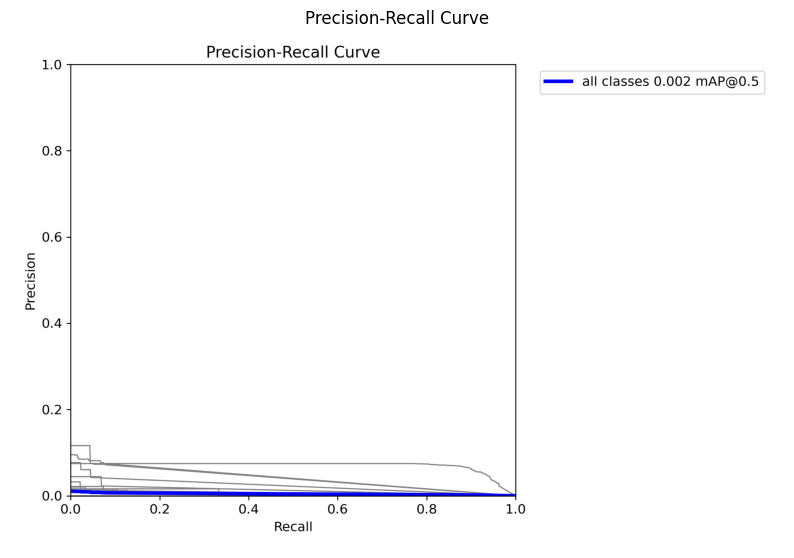

In [ ]:
# Precision-Recall –∫—Ä–∏–≤—ã–µ
precision_recall_curve = f"{metrics_path}/PR_curve.png"
img = plt.imread(precision_recall_curve)
plt.figure(figsize=(10, 8))
plt.title("Precision-Recall Curve")
plt.imshow(img)
plt.axis('off')
plt.show()

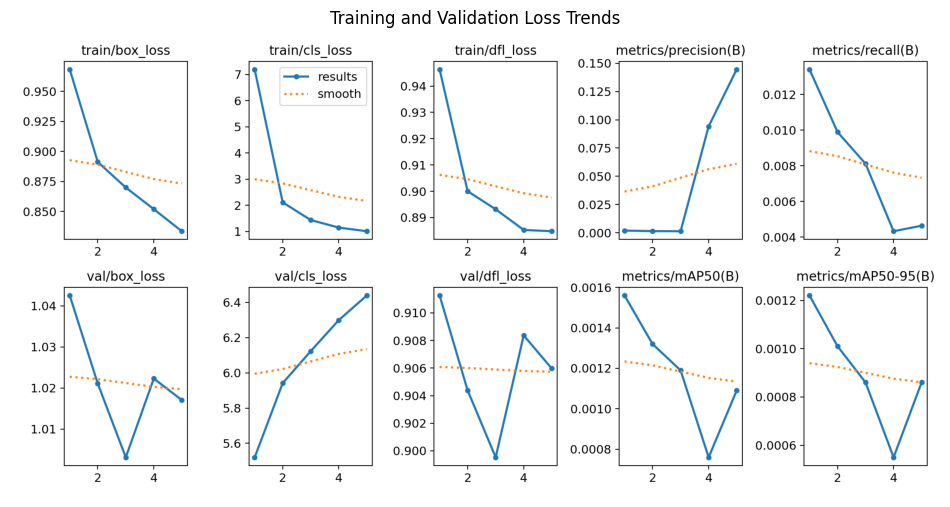

In [ ]:
# Loss Graphs (Loss, Precision, Recall, mAP@0.5)
loss_graph = f"{metrics_path}/results.png"
img = plt.imread(loss_graph)
plt.figure(figsize=(12, 8))
plt.title("Training and Validation Loss Trends")
plt.imshow(img)
plt.axis('off')
plt.show()

##–û–±—É—á–µ–Ω–∏–µ 5-10 —ç–ø–æ—Ö–∞

In [ ]:
model_2 = YOLO('./TrafficSignsDetection/yolov11s_original/weights/best.pt')
results_2 = model_2.train(
    data=yaml_path,
    epochs=5,
    batch=8,
    imgsz=1280,
    plots= True,
    device=0,
    project='TrafficSignsDetection',
    name='yolov11s_original_2',
    save=True,
    save_period=2,
)
metrics_path = "./TrafficSignsDetection/yolov11s_original_2"

Ultralytics 8.3.97 üöÄ Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=./TrafficSignsDetection/yolov11s_original/weights/best.pt, data=./dataset/traffic_signs.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=1280, save=True, save_period=2, cache=False, device=0, workers=8, project=TrafficSignsDetection, name=yolov11s_original_2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

train: Scanning /content/dataset/train/labels.cache... 7844 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7844/7844 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels.cache... 5000 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [00:00<?, ?it/s]


Plotting labels to TrafficSignsDetection/yolov11s_original_2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=6.3e-05, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to TrafficSignsDetection/yolov11s_original_2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      9.02G     0.8596       2.17     0.8944          4       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:41<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:53<00:00,  2.75it/s]

                   all       5000       8866    0.00179    0.00864    0.00133    0.00104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      9.43G     0.8787      1.385     0.8958          6       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:48<00:00,  2.89it/s]


                   all       5000       8866    0.00171    0.00764    0.00135    0.00107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      9.47G     0.8613      1.047     0.8908          6       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:46<00:00,  2.95it/s]


                   all       5000       8866     0.0581    0.00479   0.000548    0.00039

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      9.51G     0.8459     0.8885     0.8827          9       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:12<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:44<00:00,  3.00it/s]


                   all       5000       8866      0.051    0.00415   0.000558   0.000405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      9.51G     0.8262     0.8012     0.8826          8       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:45<00:00,  2.96it/s]

                   all       5000       8866     0.0726    0.00451   0.000816   0.000598



5 epochs completed in 1.015 hours.
Optimizer stripped from TrafficSignsDetection/yolov11s_original_2/weights/last.pt, 19.4MB
Optimizer stripped from TrafficSignsDetection/yolov11s_original_2/weights/best.pt, 19.4MB

Validating TrafficSignsDetection/yolov11s_original_2/weights/best.pt...
Ultralytics 8.3.97 üöÄ Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,472,785 parameters, 0 gradients, 21.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:37<00:00,  3.20it/s]


                   all       5000       8866    0.00172    0.00764    0.00135    0.00107
                   2_1        929        934     0.0296      0.956     0.0766     0.0532
                  1_23        225        229          0          0          0          0
                  1_17        103        107          0          0          0          0
                  3_24        319        343          0          0          0          0
                 8_2_1         74         74          0          0          0          0
                  5_20        148        154          0          0          0          0
                5_19_1       1311       2117          0          0          0          0
                  5_16        424        445          0          0          0          0
                  3_25         10         10          0          0          0          0
                  6_16         97         97          0          0          0          0
                  7_1

##–ú–µ—Ç—Ä–∏–∫–∏(5-10 —ç–ø–æ—Ö–∞)

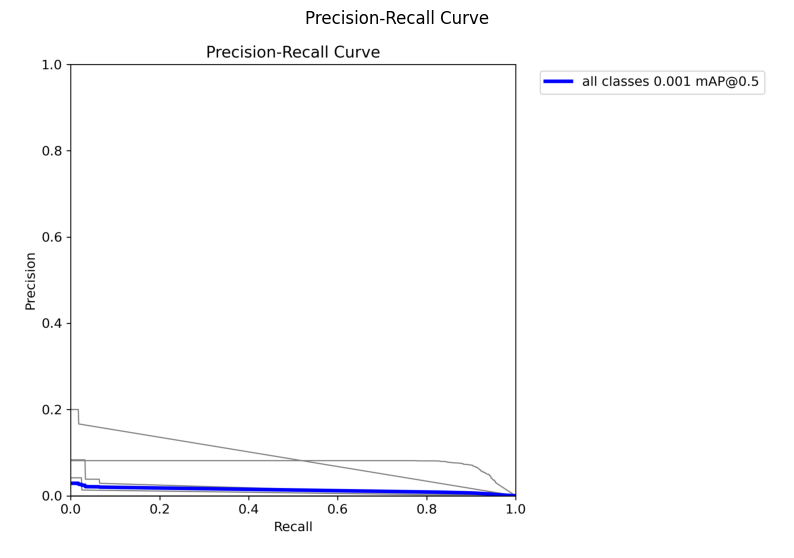

In [ ]:
# Precision-Recall –∫—Ä–∏–≤—ã–µ
precision_recall_curve = f"{metrics_path}/PR_curve.png"
img = plt.imread(precision_recall_curve)
plt.figure(figsize=(10, 8))
plt.title("Precision-Recall Curve")
plt.imshow(img)
plt.axis('off')
plt.show()

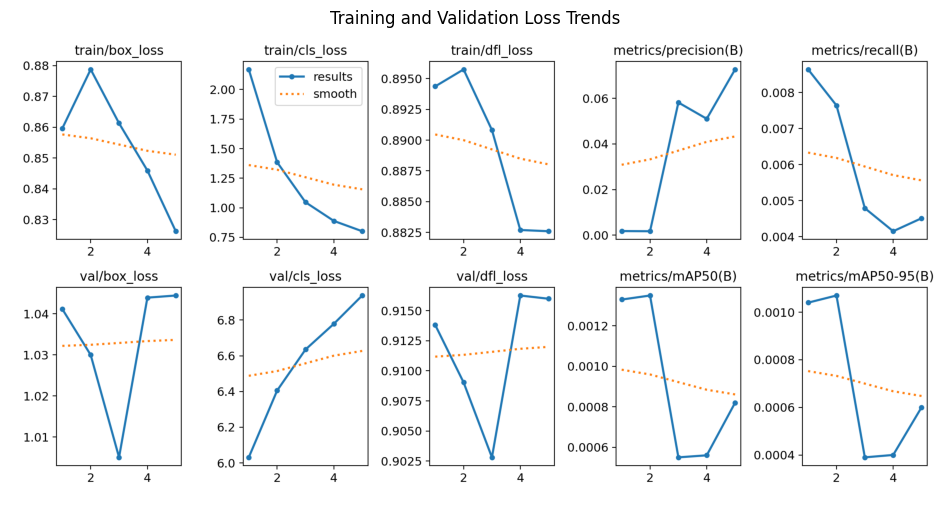

In [ ]:
# Loss Graphs (Loss, Precision, Recall, mAP@0.5)
loss_graph = f"{metrics_path}/results.png"
img = plt.imread(loss_graph)
plt.figure(figsize=(12, 8))
plt.title("Training and Validation Loss Trends")
plt.imshow(img)
plt.axis('off')
plt.show()

##–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞–±–æ—Ç—ã

In [ ]:
example_video_path = './–í–∏–¥–µ–æ_—Ç–µ—Å—Ç.mp4'
model_best = YOLO("./TrafficSignsDetection/yolov11s_original_2/weights/best.pt")

video_output = model_best.predict(source=example_video_path, conf=0.6, save=True)

In [ ]:
path="./runs/detect/predict5/–í–∏–¥–µ–æ_—Ç–µ—Å—Ç.avi"

clip=VideoFileClip(path)
clip.ipython_display(width=960)


image 1/1 /content/—Ç–µ—Å—Ç.jpeg: 864x1280 4 2_1s, 50.4ms
Speed: 22.0ms preprocess, 50.4ms inference, 367.7ms postprocess per image at shape (1, 3, 864, 1280)
Results saved to runs/detect/predict6
1 label saved to runs/detect/predict6/labels


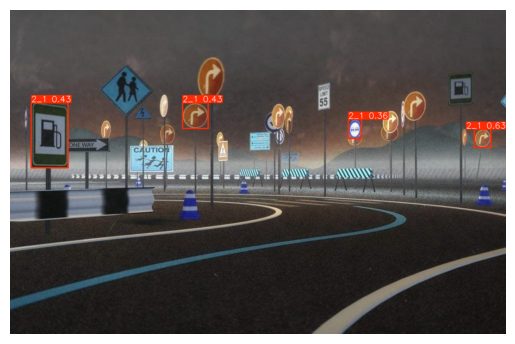

In [ ]:
image_test_path = './—Ç–µ—Å—Ç.jpeg'
pred = model_best.predict(source=image_test_path,
                         save=True, save_txt=True)

test_image = pred[0].plot(line_width=2)
plt.axis('off')
plt.imshow(test_image)

#–ê–£–ì–ú–ï–ù–¢–¶–ê–¶–ò–Ø –î–ê–ù–ù–´–•

In [ ]:
# C–∫–æ–ø–∏—Ä—É–µ–º –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö.
folder = path_yolo_dataset
new_folder = './augmentation_dataset'
shutil.copytree(folder,new_folder)

# –ü—É—Ç–∏ –∫ –¥–∞–Ω–Ω—ã–º
images_dir = f"{new_folder}/train/images"
labels_dir = f"{new_folder}/train/labels"

# –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–µ –ø–∞–ø–∫–∏ –¥–ª—è –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
images_aug_dir = f"{new_folder}/train_aug/images"
labels_aug_dir = f"{new_folder}/train_aug/labels"
os.makedirs(images_aug_dir, exist_ok=True)
os.makedirs(labels_aug_dir, exist_ok=True)

In [ ]:
# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
transform = A.Compose([
    A.RandomBrightnessContrast(
        brightness_limit=(-0.3, 0),   # –£–º–µ–Ω—å—à–∞–µ–º —è—Ä–∫–æ—Å—Ç—å, –Ω–æ –Ω–µ –¥–æ –ø–æ–ª–Ω–æ–π —Ç–µ–º–Ω–æ—Ç—ã
        contrast_limit=(-0.2, 0),     # –£–º–µ–Ω—å—à–∞–µ–º –∫–æ–Ω—Ç—Ä–∞—Å—Ç
        p=0.8
    ),
    A.GaussianBlur(blur_limit=(1, 3), p=0.3),  # –ù–µ–±–æ–ª—å—à–æ–µ —Ä–∞–∑–º—ã—Ç–∏–µ –¥–ª—è —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ—Å—Ç–∏
    A.HueSaturationValue(
        hue_shift_limit=10,
        sat_shift_limit=(-40, -20),    # –£–º–µ–Ω—å—à–∞–µ–º –Ω–∞—Å—ã—â–µ–Ω–Ω–æ—Å—Ç—å, —á—Ç–æ–±—ã –∏–º–∏—Ç–∏—Ä–æ–≤–∞—Ç—å –Ω–æ—á–Ω—ã–µ —É—Å–ª–æ–≤–∏—è
        val_shift_limit=(-30, -10),     # –£–º–µ–Ω—å—à–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ (–¥–µ–ª–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Ç–µ–º–Ω–µ–µ)
        p=0.5
    ),
    A.RandomGamma(
        gamma_limit=(30, 70),           # –£–º–µ–Ω—å—à–∞–µ–º –≥–∞–º–º—É –¥–ª—è —Ç–µ–º–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
        p=0.5
    ),
    A.ISONoise(
        color_shift=(0.01, 0.05),       # –ù–µ–º–Ω–æ–≥–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ–º —à—É–º –Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏
        intensity=(0.05, 0.15),         # –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å —à—É–º–∞ –¥–ª—è —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ—Å—Ç–∏
        p=0.5
    ),
])


In [ ]:
def augmentation(transform,images_dir,labels_dir,images_aug_dir,labels_aug_dir):
    # –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –≤—Å–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º
    for image_name in tqdm(os.listdir(images_dir)):

        # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º –Ω–µ-–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        if not image_name.lower().endswith('.jpg'):
            continue

        # –ó–∞–≥—Ä—É–∂–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        image_path = os.path.join(images_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # –ü—Ä–∏–º–µ–Ω—è–µ–º –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—é
        augmented_image = transform(image=image)["image"]

        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        new_image_path = os.path.join(images_aug_dir, 'aug_'+image_name)
        cv2.imwrite(new_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

        # –ö–æ–ø–∏—Ä—É–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π —Ñ–∞–π–ª —Ä–∞–∑–º–µ—Ç–∫–∏
        label_name = os.path.splitext(image_name)[0] + ".txt"
        label_path = os.path.join(labels_dir, label_name)
        new_label_path = os.path.join(labels_aug_dir, 'aug_'+label_name)
        shutil.copy(label_path, new_label_path)

    print(f'–§–∞–π–ª–æ–≤ –≤ –ø–∞–ø–∫–µ images: {len(os.listdir(images_aug_dir))}')
    print(f'–§–∞–π–ª–æ–≤ –≤ –ø–∞–ø–∫–µ labels: {len(os.listdir(labels_aug_dir))}')

In [ ]:
augmentation(transform,
             images_dir,labels_dir,
             images_aug_dir,labels_aug_dir)

  0%|          | 0/7844 [00:00<?, ?it/s]

–§–∞–π–ª–æ–≤ –≤ –ø–∞–ø–∫–µ images: 7844
–§–∞–π–ª–æ–≤ –≤ –ø–∞–ø–∫–µ labels: 7844


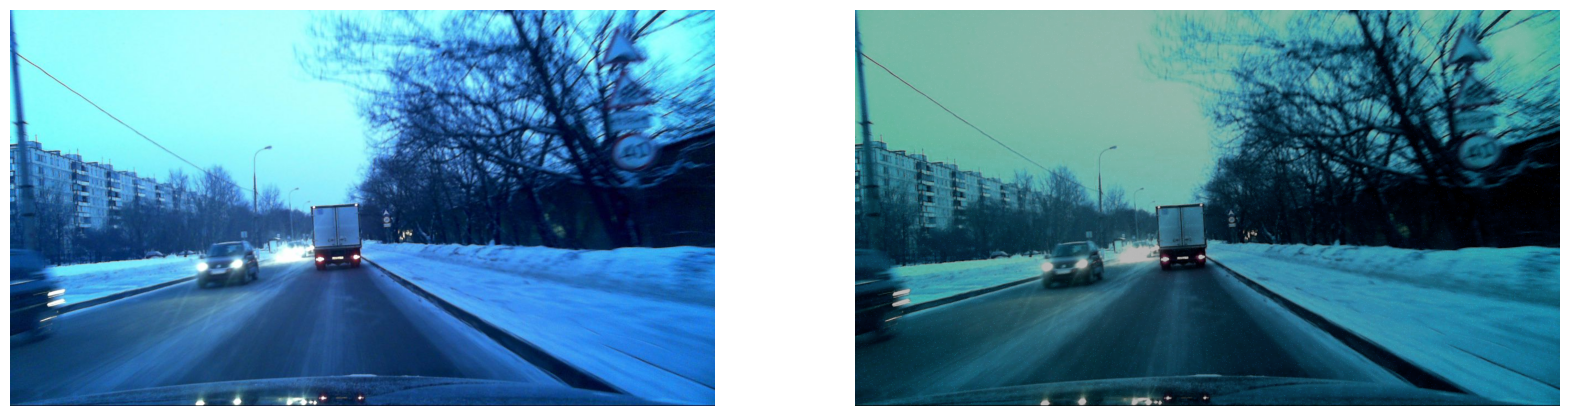

In [ ]:
image = cv2.imread(f'{new_folder}/train/images/autosave01_02_2012_09_13_45.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

augmented = transform(image=image)["image"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)
ax1.imshow(image)
ax2.imshow(augmented)
[ax.axis('off') for ax in [ax1, ax2]]
plt.show()

In [ ]:
#–∏—Å–ø—Ä–∞–≤–∏–º yaml file
data = {
    'path': '.'+new_folder,
    'train': 'train_aug/images',
    'val': 'valid/images',
}

if only_detect:
    data['names'] = {
        0: 'traffic_sign'
    }
else:
    with open(labels_path, 'r') as file:
        class_names = [line.strip() for line in file]
        id2class = dict(zip(range(len(class_names)), class_names))
        data['names'] = id2class

yaml_path_aug = f'{new_folder}/traffic_signs.yaml'
with open(yaml_path_aug, 'w') as file:
    yaml.dump(data, file)

#–î–û–û–ë–£–ß–ï–ù–ò–ï –ù–ê –ê–£–ì–ú–ï–ù–¢–ò–†–û–í–ê–ù–ù–´–• –î–ê–ù–ù–´–•

In [ ]:
# model_aug = YOLO("./TrafficSignsDetection/yolov11s_original/weights/best.pt")
model_aug = YOLO('/content/best_yolo11s_5_epochs.pt')

In [ ]:
# –ü—Ä–æ–≤–µ–¥—ë–º –æ–±—É—á–µ–Ω–∏–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –º–æ–¥–µ–ª–∏ yolo11s –∏ –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
results_aug = model_aug.train(
    data=yaml_path_aug,
    epochs=5,
    batch=8,
    imgsz=1280,
    plots= True,
    device=0,
    project='TrafficSignsDetection',
    name='yolov11s_aug',
    save=True,
    save_period=2
)

metrics_path = "./TrafficSignsDetection/yolov11s_aug"

Ultralytics 8.3.98 üöÄ Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/best_yolo11s_5_epochs.pt, data=./augmentation_dataset/traffic_signs.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=1280, save=True, save_period=2, cache=False, device=0, workers=8, project=TrafficSignsDetection, name=yolov11s_aug, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 23.5MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.35M/5.35M [00:00<00:00, 94.1MB/s]


AMP: checks passed ‚úÖ


train: Scanning /content/augmentation_dataset/train_aug/labels... 7844 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7844/7844 [00:04<00:00, 1939.43it/s]


train: New cache created: /content/augmentation_dataset/train_aug/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/augmentation_dataset/valid/labels... 5000 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [00:10<00:00, 469.56it/s]


val: New cache created: /content/augmentation_dataset/valid/labels.cache
Plotting labels to TrafficSignsDetection/yolov11s_aug/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=6.3e-05, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ‚úÖ
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to TrafficSignsDetection/yolov11s_aug
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      9.25G       0.92      2.315     0.9169          4       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:56<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [02:01<00:00,  2.58it/s]

                   all       5000       8866    0.00248    0.00887    0.00173    0.00139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      9.66G     0.9225      1.453     0.9119          6       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:56<00:00,  2.68it/s]


                   all       5000       8866     0.0796    0.00637   0.000982   0.000781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5       9.7G     0.9029      1.103     0.9063          6       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:56<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:51<00:00,  2.81it/s]


                   all       5000       8866     0.0509     0.0042   0.000612   0.000455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      9.74G     0.8821     0.9352     0.8983          9       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:59<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [02:12<00:00,  2.37it/s]


                   all       5000       8866     0.0726     0.0044   0.000586   0.000423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      9.79G     0.8634      0.846      0.895          8       1280: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 981/981 [10:21<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:49<00:00,  2.87it/s]


                   all       5000       8866     0.0582    0.00453      0.001   0.000721

5 epochs completed in 1.069 hours.
Optimizer stripped from TrafficSignsDetection/yolov11s_aug/weights/last.pt, 19.4MB
Optimizer stripped from TrafficSignsDetection/yolov11s_aug/weights/best.pt, 19.4MB

Validating TrafficSignsDetection/yolov11s_aug/weights/best.pt...
Ultralytics 8.3.98 üöÄ Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,472,785 parameters, 0 gradients, 21.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:41<00:00,  3.09it/s]


                   all       5000       8866     0.0024    0.00887     0.0017    0.00136
                   2_1        929        934     0.0337      0.941     0.0732     0.0515
                  1_23        225        229          0          0          0          0
                  1_17        103        107          0          0          0          0
                  3_24        319        343          0          0          0          0
                 8_2_1         74         74          0          0          0          0
                  5_20        148        154          0          0          0          0
                5_19_1       1311       2117          0          0          0          0
                  5_16        424        445      0.143    0.00449     0.0725     0.0652
                  3_25         10         10          0          0          0          0
                  6_16         97         97          0          0          0          0
                  7_1

##–ú–µ—Ç—Ä–∏–∫–∏

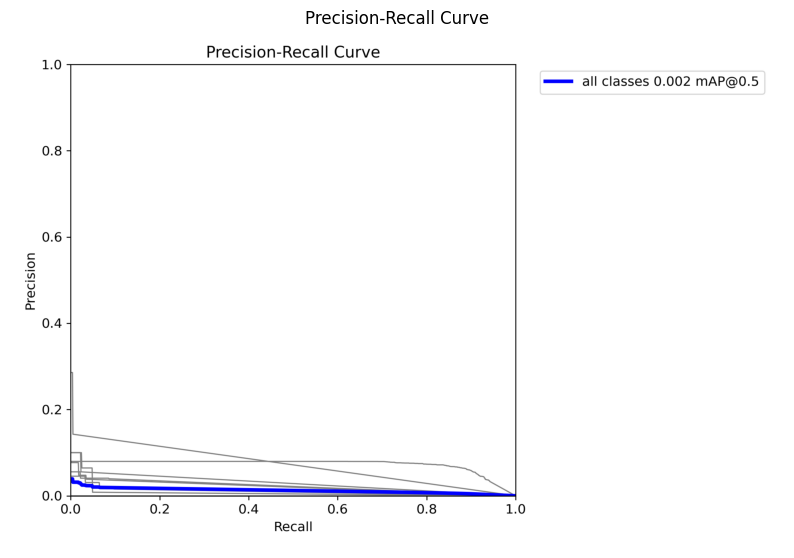

In [ ]:
# Precision-Recall –∫—Ä–∏–≤—ã–µ
precision_recall_curve = f"{metrics_path}/PR_curve.png"
img = plt.imread(precision_recall_curve)
plt.figure(figsize=(10, 8))
plt.title("Precision-Recall Curve")
plt.imshow(img)
plt.axis('off')
plt.show()

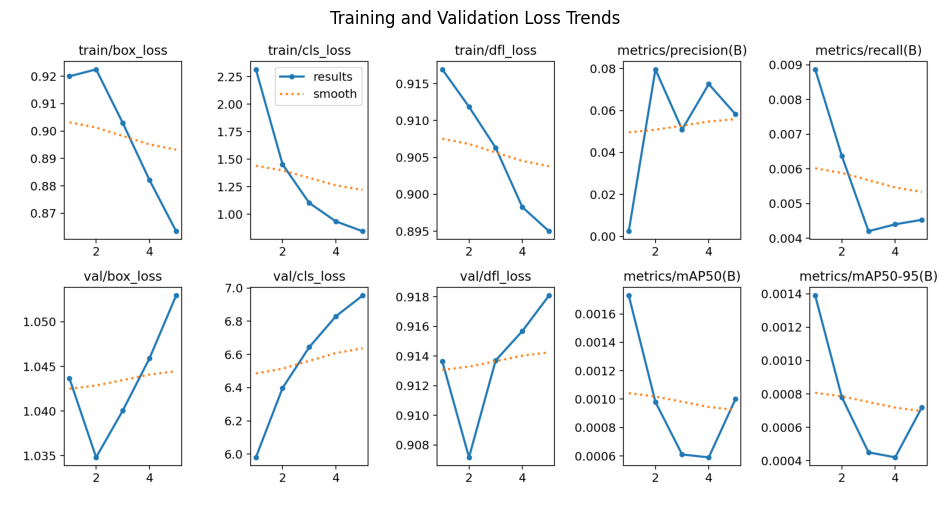

In [ ]:
# Loss Graphs (Loss, Precision, Recall, mAP@0.5)
loss_graph = f"{metrics_path}/results.png"
img = plt.imread(loss_graph)
plt.figure(figsize=(12, 8))
plt.title("Training and Validation Loss Trends")
plt.imshow(img)
plt.axis('off')
plt.show()

##–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞–±–æ—Ç—ã

In [ ]:
example_video_path = './–í–∏–¥–µ–æ_—Ç–µ—Å—Ç.mp4'
model_aug_best = YOLO("./TrafficSignsDetection/yolov11s_aug/weights/best.pt")

video_output = model_aug_best.predict(source=example_video_path, conf=0.6, save=True)

In [ ]:
path="./runs/detect/predict2/–í–∏–¥–µ–æ_—Ç–µ—Å—Ç.avi"

clip=VideoFileClip(path)
clip.ipython_display(width=960)


image 1/1 /content/—Ç–µ—Å—Ç.jpeg: 864x1280 6 2_1s, 51.6ms
Speed: 9.5ms preprocess, 51.6ms inference, 1.6ms postprocess per image at shape (1, 3, 864, 1280)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


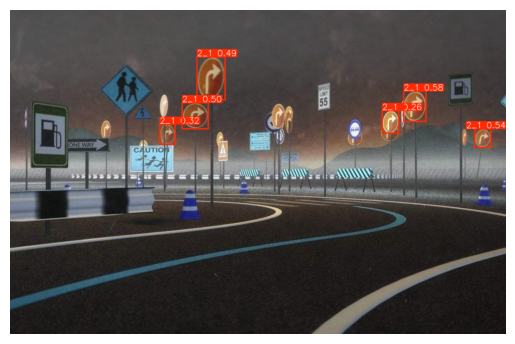

In [ ]:
image_test_path = './—Ç–µ—Å—Ç.jpeg'
pred = model_aug_best.predict(source=image_test_path,
                         save=True, save_txt=True)

test_image = pred[0].plot(line_width=2)
plt.axis('off')
plt.imshow(test_image)

#–í–´–í–û–î–´

##–û—Å–Ω–æ–≤–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã


*  –í —Ö–æ–¥–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –±—ã–ª–∏ –∏–∑—É—á–µ–Ω—ã —Ä–∞–∑–ª–∏—á–Ω—ã–µ –º–µ—Ç–æ–¥—ã –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ —Å–ø–æ—Å–æ–±–Ω—ã –ø–æ–≤—ã—Å–∏—Ç—å —Ç–æ—á–Ω–æ—Å—Ç—å —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –¥–æ—Ä–æ–∂–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤ –≤ —É—Å–ª–æ–≤–∏—è—Ö –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–π –≤–∏–¥–∏–º–æ—Å—Ç–∏. –≠—Ç–∏ –º–µ—Ç–æ–¥—ã —Å—Ä–∞–≤–Ω–∏–≤–∞–ª–∏—Å—å —Å –≥—Ä—É–ø–ø–æ–π, –∫–æ—Ç–æ—Ä–∞—è –±—ã–ª–∞ –æ–±—É—á–µ–Ω–∞ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –±–µ–∑ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏.

*  –í —á–∞—Å—Ç–Ω–æ—Å—Ç–∏, –ø—Ä–∏–º–µ–Ω—è–ª–∏—Å—å —Ç–µ—Ö–Ω–∏–∫–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è —è—Ä–∫–æ—Å—Ç–∏, –∫–æ–Ω—Ç—Ä–∞—Å—Ç–Ω–æ—Å—Ç–∏, —Ä–∞–∑–º—ã—Ç–æ—Å—Ç–∏ –∏ –Ω–∞—Å—ã—â–µ–Ω–Ω–æ—Å—Ç–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –ë–ª–∞–≥–æ–¥–∞—Ä—è —ç—Ç–æ–º—É –º–æ–¥–µ–ª—å YOLO —Å—Ç–∞–ª–∞ –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ –æ–ø—Ä–µ–¥–µ–ª—è—Ç—å –æ–±—ä–µ–∫—Ç—ã –¥–∞–∂–µ –≤ —Å–ª–æ–∂–Ω—ã—Ö —É—Å–ª–æ–≤–∏—è—Ö –æ—Å–≤–µ—â–µ–Ω–∏—è.

*  –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—Ç, —á—Ç–æ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —è–≤–ª—è–µ—Ç—Å—è –≤–∞–∂–Ω—ã–º –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–º –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–µ–π, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏.

##–ü—Ä–æ–±–ª–µ–º—ã –∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è

–ü—Ä–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–æ–µ–∫—Ç–∞ —Å–ª–µ–¥—É–µ—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å —Ä—è–¥ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–π, –≥–ª–∞–≤–Ω—ã–º –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö —è–≤–ª—è—é—Ç—Å—è –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã–µ —Ä–µ—Å—É—Ä—Å—ã. –°–ª–æ–∂–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –æ–±—Ä–∞–±–æ—Ç–∫–∏ –±–æ–ª—å—à–æ–≥–æ –æ–±—ä–µ–º–∞ –¥–∞–Ω–Ω—ã—Ö —Ç—Ä–µ–±—É—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã—Ö –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã—Ö –º–æ—â–Ω–æ—Å—Ç–µ–π. –ï—Å–ª–∏ –∏—Ö –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç, —ç—Ç–æ –º–æ–∂–µ—Ç —Å–∫–∞–∑–∞—Ç—å—Å—è –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –æ–±—ä–µ–∫—Ç–æ–≤, —á—Ç–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –æ—Ç—Ä–∞–∑–∏—Ç—Å—è –Ω–∞ –∏—Ç–æ–≥–æ–≤—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞—Ö —Ä–∞–±–æ—Ç—ã —Å–∏—Å—Ç–µ–º—ã.

##–í–æ–∑–º–æ–∂–Ω—ã–µ —É–ª—É—á—à–µ–Ω–∏—è

–î–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –¥–æ—Ä–æ–∂–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤ –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –ø–æ–¥—Ö–æ–¥–æ–≤.
*   –û–¥–Ω–∏–º –∏–∑ —Ç–∞–∫–∏—Ö –º–µ—Ç–æ–¥–æ–≤ —è–≤–ª—è–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –≤–º–µ—Å—Ç–æ –∏—Ö –æ–±—Ä–µ–∑–∫–∏. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç —É–ª—É—á—à–∏—Ç—å –æ–±–∏–ª–∏–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ.
*  –¢–∞–∫–∂–µ —Ü–µ–ª–µ—Å–æ–æ–±—Ä–∞–∑–Ω–æ –¥–æ–±–∞–≤–ª—è—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞–∫–∏ –Ω–∞ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Å –∑–∞–º–µ–Ω–æ–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∑–Ω–∞–∫–æ–≤.

–î–∞–Ω–Ω—ã–µ –ø—Ä–∞–∫—Ç–∏–∫–∏ –º–æ–≥—É—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –ø–æ–≤—ã—à–µ–Ω–∏—é –æ–±—â–µ–π –Ω–∞–¥–µ–∂–Ω–æ—Å—Ç–∏ –∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏ YOLO –≤ —É—Å–ª–æ–≤–∏—è—Ö —Å–ª–æ–∂–Ω–æ–≥–æ –æ—Å–≤–µ—â–µ–Ω–∏—è.